In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print("This is as of " + str(datetime.now()))

This is as of 2017-06-25 20:13:31.455862


In [14]:
# Get the latest data from the Chicago data portal right now
%run "Get beach_days from API.ipynb"
beach_days.head()

Deleting columns: 
There are 20 beaches


,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
0,172.034880,3273,"{'type': 'Point', 'coordinates': [-87.6635, 42...",2017-06-25,Leone,75.6
1,38.366652,3291,"{'type': 'Point', 'coordinates': [-87.6515, 41...",2017-06-25,Foster,101.1
2,347.818918,3267,"{'type': 'Point', 'coordinates': [-87.5797, 41...",2017-06-25,57th Street,90.6
3,897.724345,3270,"{'type': 'Point', 'coordinates': [-87.703717, ...",2017-06-25,Humboldt,NaN
4,350.431163,3285,"{'type': 'Point', 'coordinates': [-87.551, 41....",2017-06-25,Rainbow,NaN


In [15]:
# How many days of samples were taken
print("Samples were taken across %s days" % len(beach_days['date'].unique()))

Samples were taken across 31 days


In [16]:
print("There are %s total beach-days, and %s unique predictions" %
     (str(len(beach_days)), str(len(beach_days.loc[~beach_days['predicted_level'].isnull()]))))

There are 613 total beach-days, and 427 unique predictions


In [17]:
# Get the last measurement taken for each beach
last_measurement = beach_days.sort_values('date', ascending=False).drop_duplicates('beach_name', keep='first')
last_measurement

,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
0,172.034880,3273,"{'type': 'Point', 'coordinates': [-87.6635, 42...",2017-06-25,Leone,75.6
11,141.732142,3275,"{'type': 'Point', 'coordinates': [-87.6666, 42...",2017-06-25,Rogers,100.8
1,38.366652,3291,"{'type': 'Point', 'coordinates': [-87.6515, 41...",2017-06-25,Foster,101.1
19,675.695938,3266,"{'type': 'Point', 'coordinates': [-87.5636, 41...",2017-06-25,South Shore,NaN
18,321.582027,3268,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-25,Margaret T Burroughs (31st),114.3
17,157.581725,3293,"{'type': 'Point', 'coordinates': [-87.6647, 42...",2017-06-25,Marion Mahony Griffin (Jarvis),78.0
16,149.519230,3286,"{'type': 'Point', 'coordinates': [-87.5748, 41...",2017-06-25,63rd Street,NaN
15,278.066539,3265,"{'type': 'Point', 'coordinates': [-87.5299, 41...",2017-06-25,Calumet,NaN
13,69.821200,3288,"{'type': 'Point', 'coordinates': [-87.6083, 41...",2017-06-25,12th Street,120.3
12,246.105668,3287,"{'type': 'Point', 'coordinates': [-87.5976, 41...",2017-06-25,Oakwood,101.6


In [18]:
last_measurement.loc[last_measurement['dna_reading_mean'] > 1000]

,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level


In [19]:
# This is no fun to look at since there are no samples exceeding the threshold.  Let's see what would happen if
# today were 6/14/2017

In [20]:
june_14 = pd.to_datetime("June 14, 2017").date()
beach_days = beach_days.loc[beach_days['date'] <= june_14]
last_measurement = beach_days.sort_values('date', ascending=False).drop_duplicates('beach_name', keep='first')

In [23]:
last_measurement.loc[last_measurement['dna_reading_mean'] > 1000].sort_values('dna_reading_mean', ascending=False)

,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
237,2519.698196,2926,"{'type': 'Point', 'coordinates': [-87.6385, 41...",2017-06-14,Montrose,NaN
220,2244.110291,2878,"{'type': 'Point', 'coordinates': [-87.5748, 41...",2017-06-14,63rd Street,NaN
222,1359.615019,2879,"{'type': 'Point', 'coordinates': [-87.5797, 41...",2017-06-14,57th Street,156.5
230,1345.218198,2880,"{'type': 'Point', 'coordinates': [-87.5976, 41...",2017-06-14,Oakwood,128.6
226,1034.629886,2881,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-14,Margaret T Burroughs (31st),436.5


In [26]:
beaches_last_exceeding = last_measurement.loc[last_measurement['dna_reading_mean'] > 1000].sort_values('dna_reading_mean', ascending=False)['beach_name'].unique()
beaches_last_exceeding

array(['Montrose', '63rd Street', '57th Street', 'Oakwood',
       'Margaret T Burroughs (31st)'], dtype=object)

In [25]:
beach_days.loc[beach_days['date'].astype(str) == '2017-06-13']

,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
240,119.381741,2869,"{'type': 'Point', 'coordinates': [-87.6083, 41...",2017-06-13,12th Street,416.9
241,270.244334,2865,"{'type': 'Point', 'coordinates': [-87.5299, 41...",2017-06-13,Calumet,NaN
242,44.497191,2893,"{'type': 'Point', 'coordinates': [-87.6666, 42...",2017-06-13,Rogers,122.2
243,3619.694186,2872,"{'type': 'Point', 'coordinates': [-87.6385, 41...",2017-06-13,Montrose,NaN
244,2036.163058,2886,"{'type': 'Point', 'coordinates': [-87.5797, 41...",2017-06-13,57th Street,150.6
245,577.996540,2885,"{'type': 'Point', 'coordinates': [-87.5636, 41...",2017-06-13,South Shore,NaN
246,26.720778,2892,"{'type': 'Point', 'coordinates': [-87.6647, 42...",2017-06-13,Marion Mahony Griffin (Jarvis),96.8
247,158.322456,2873,"{'type': 'Point', 'coordinates': [-87.6545, 41...",2017-06-13,Osterman,288.8
248,1323.716359,2866,"{'type': 'Point', 'coordinates': [-87.551, 41....",2017-06-13,Rainbow,NaN
249,1284.952917,2871,"{'type': 'Point', 'coordinates': [-87.703717, ...",2017-06-13,Humboldt,NaN


In [5]:
print("There were %s samples predicted above the threshold, and %s that actually were" %
     (str(len(beach_days.loc[beach_days['predicted_level'] > 1000])),
      str(len(beach_days.loc[beach_days['dna_reading_mean'] > 1000]))))

There were 0 samples predicted above the threshold, and 43 that actually were


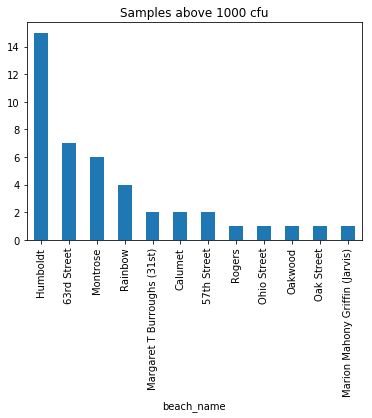

In [6]:
# For the DNA testing, the threshold for an advisory is 1000 CFU.  How many beaches exceed that?
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('beach_name').count()['date']\
    .sort_values(ascending=False).plot(kind="bar", title="Samples above 1000 cfu")

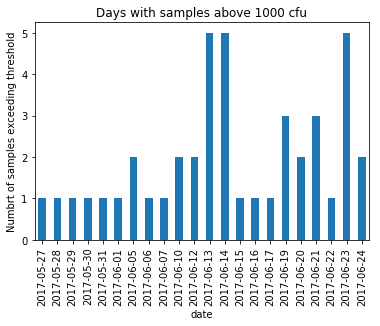

In [7]:
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('date').count()['location']\
    .plot(kind="bar", title="Days with samples above 1000 cfu").set_ylabel("Numbrt of samples exceeding threshold")

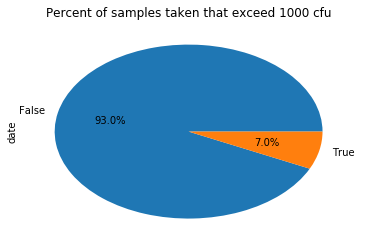

In [8]:
# Samples that exceed threshold
beach_days['dna_exceeds'] = beach_days['dna_reading_mean'] > 1000
beach_days.groupby('dna_exceeds').count()['date'].plot(kind="pie", title="Percent of samples taken that exceed 1000 cfu", autopct='%1.1f%%')

In [9]:
# What have been the highest readings so far?
beach_days.sort_values('dna_reading_mean', ascending=False)[['beach_name', 'date', 'dna_reading_mean']].head(20)

,beach_name,date,dna_reading_mean
250,63rd Street,2017-06-13,9386.074046
47,Humboldt,2017-06-23,7451.962963
120,Ohio Street,2017-06-19,6264.337954
209,Humboldt,2017-06-15,6083.474829
550,Humboldt,2017-05-29,5669.991182
43,63rd Street,2017-06-23,5393.683435
536,Humboldt,2017-05-30,4565.198791
109,63rd Street,2017-06-20,3794.843080
243,Montrose,2017-06-13,3619.694186
397,Montrose,2017-06-05,3223.844289
